In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from deepcell.utils.tracking_utils import trks_stats, save_trks

import masks
import gif
import raw
import lineage

In [2]:
#f_meta = h5py.File('../22956819/22956819_metadata.hdf5')
#f_meta.keys()

In [3]:
#pic = f_meta['full_data'][0]
#plt.imshow(pic)

In [4]:
#pic_s = pic[180:710, 180:710]
#plt.imshow(pic_s)

In [5]:
# Input file
fN = h5py.File("../22956819/22956819_featuresN.hdf5", "r")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
timeseries = fN['timeseries_data']

In [6]:
traj = pd.read_hdf("../22956819/22956819_featuresN.hdf5", '/trajectories_data')

In [7]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A5', 'A6', 'A7', 'A8', 'B5', 'B6', 'B7', 'B8', 'C5', 'C6', 'C7', 'C8', 'D5', 'D6', 'D7', 'D8']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [8]:
# Well positions:

d8 = [180, 710, 180, 710]
d7 = [180, 710, 900, 1430]
d6 = [180, 710, 1620, 2150]
d5 = [180, 710, 2340, 2870]

c8 = [910, 1440, 180, 710]
c7 = [910, 1440, 900, 1430]
c6 = [910, 1440, 1620, 2150]
c5 = [910, 1440, 2340, 2870]

b8 = [1630, 2160, 180, 710]
b7 = [1630, 2160, 900, 1430]
b6 = [1630, 2160, 1620, 2150]
b5 = [1630, 2160, 2340, 2870]

a8 = [2350, 2880, 180, 710]
a7 = [2350, 2880, 900, 1430]
a6 = [2350, 2880, 1620, 2150]
a5 = [2350, 2880, 2340, 2870]

# Make masks

In [9]:
### Finish making masks~

#for well in well_dict.keys():
#    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../22956819/")


In [18]:
# Skip C8 

for well in ['D5', 'D6', 'D7', 'D8']:
    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../22956819/")

[22, 23, 31, 41, 61, 72, 211, 221, 237, 239, 241, 256, 257, 261, 266, 313, 315, 364, 366, 371, 374, 375, 376, 378, 380, 394, 395, 397, 399, 400, 403, 413, 415, 417, 419, 428, 434, 435, 441, 469, 743, 762, 776, 799, 802, 803, 806, 889, 890, 892, 893, 894, 895, 902, 903, 905, 909]
[0, 0, 325, 575, 675, 711, 1762, 1831, 1895, 1916, 1925, 2025, 2025, 2050, 2075, 2267, 2293, 2625, 2636, 2703, 2727, 2730, 2730, 2733, 2747, 2784, 2784, 2792, 2797, 2797, 2800, 2839, 2864, 2887, 2900, 2979, 3012, 3025, 3064, 3225, 5900, 6032, 6250, 6605, 6621, 6621, 6632, 7589, 7589, 7608, 7619, 7619, 7624, 7705, 7705, 7720, 7724]
--------------------D5------------------------
Starts at:  0
Finish frame_index:  0
--- 0.036988258361816406 seconds ---
Finish frame_index:  200
--- 6.0169970989227295 seconds ---
Finish frame_index:  400
--- 11.561507225036621 seconds ---
Finish!
--- 17.18104386329651 seconds ---
length of list_stack:  600
--------------------D5------------------------
Starts at:  0
Finish frame_ind

# Make raw wells

In [16]:
well_names = well_dict.keys()
wells = [a5, a6, a6, a8, b5, b6, b7, b8, c5, c6, c7, c8, d5, d6, d7, d8]

In [12]:
for i, well_name in enumerate(well_names):
    output = "../22956819/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../22956819/22956819.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A5 --------
-------- A6 --------
-------- A7 --------
-------- A8 --------
-------- B5 --------
-------- B6 --------
-------- B7 --------
-------- B8 --------
-------- C5 --------
-------- C6 --------
-------- C7 --------
-------- C8 --------
-------- D5 --------
-------- D6 --------
-------- D7 --------
-------- D8 --------


In [13]:
well_names

dict_keys(['A5', 'A6', 'A7', 'A8', 'B5', 'B6', 'B7', 'B8', 'C5', 'C6', 'C7', 'C8', 'D5', 'D6', 'D7', 'D8'])

In [ ]:
for well_name in well_names:
    if well_name == 'C8':
        continue
    raw_video_path = '../22956819/raw_wells/%s_raw.npy' % well_name
    txt = '../22956819/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../22956819')

In [17]:
for well_name in ['D5', 'D6', 'D7', 'D8']:
    if well_name == 'C8':
        continue
    raw_video_path = '../22956819/raw_wells/%s_raw.npy' % well_name
    txt = '../22956819/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../22956819')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)


Processing raw video.
unique_worm_ids:  [25]
sequential ids:  [1]
Processing raw video.
unique_worm_ids:  [8, 9]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  [32]
sequential ids:  [1]


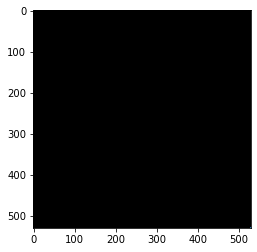

In [4]:
import gif
import numpy as np

gif.plot_gif(np.load('../22956819/D7_raw_1.npy'), '../22956819/gif/D7_raw_1.gif', raw=True)
gif.plot_gif(np.load('../22956819/D7_mask_1.npy'), '../22956819/gif/D7_mask_1.gif')

gif.plot_gif(np.load('../22956819/B7_raw_1.npy'), '../22956819/gif/B7_raw_1.gif', raw=True)
gif.plot_gif(np.load('../22956819/B7_mask_1.npy'), '../22956819/gif/B7_mask_1.gif')

gif.plot_gif(np.load('../22956819/A6_raw_4.npy'), '../22956819/gif/A6_raw_4.gif', raw=True)
gif.plot_gif(np.load('../22956819/A6_mask_1.npy'), '../22956819/gif/A6_mask_1.gif')

# Lineage

In [ ]:
from lineage import make_lineage

a5_1 = make_lineage(traj, well_dict, 'A5', "22956819", "../22956819/A5_mask_seq_1.npy", 1)
a5_2 = make_lineage(traj, well_dict, 'A5', "22956819", "../22956819/A5_mask_seq_2.npy", 2)
a5_3 = make_lineage(traj, well_dict, 'A5', "22956819", "../22956819/A5_mask_seq_3.npy", 3)
a5_4 = make_lineage(traj, well_dict, 'A5', "22956819", "../22956819/A5_mask_seq_4.npy", 4)
a6_1 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_1.npy", 1)
a6_2 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_2.npy", 2)
a6_3 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_3.npy", 3)
a6_4 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_4.npy", 4)
a6_5 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_5.npy", 5)
a6_6 = make_lineage(traj, well_dict, 'A6', "22956819", "../22956819/A6_mask_seq_6.npy", 6)
a7_1 = make_lineage(traj, well_dict, 'A7', "22956819", "../22956819/A7_mask_seq_1.npy", 1)
a8_1 = make_lineage(traj, well_dict, 'A8', "22956819", "../22956819/A8_mask_seq_1.npy", 1)
a8_2 = make_lineage(traj, well_dict, 'A8', "22956819", "../22956819/A8_mask_seq_2.npy", 2)

b5_1 = make_lineage(traj, well_dict, 'B5', "22956819", "../22956819/B5_mask_seq_1.npy", 1)
b5_2 = make_lineage(traj, well_dict, 'B5', "22956819", "../22956819/B5_mask_seq_2.npy", 2)
b6_1 = make_lineage(traj, well_dict, 'B6', "22956819", "../22956819/B6_mask_seq_1.npy", 1)
b6_2 = make_lineage(traj, well_dict, 'B6', "22956819", "../22956819/B6_mask_seq_2.npy", 2)
b7_1 = make_lineage(traj, well_dict, 'B7', "22956819", "../22956819/B7_mask_seq_1.npy", 1)
b7_2 = make_lineage(traj, well_dict, 'B7', "22956819", "../22956819/B7_mask_seq_2.npy", 2)
b8_1 = make_lineage(traj, well_dict, 'B8', "22956819", "../22956819/B8_mask_seq_1.npy", 1)
b8_2 = make_lineage(traj, well_dict, 'B8', "22956819", "../22956819/B8_mask_seq_2.npy", 2)
b8_3 = make_lineage(traj, well_dict, 'B8', "22956819", "../22956819/B8_mask_seq_3.npy", 3)
b8_4 = make_lineage(traj, well_dict, 'B8', "22956819", "../22956819/B8_mask_seq_4.npy", 4)

c5_1 = make_lineage(traj, well_dict, 'C5', "22956819", "../22956819/C5_mask_seq_1.npy", 1)
c5_2 = make_lineage(traj, well_dict, 'C5', "22956819", "../22956819/C5_mask_seq_2.npy", 2)
c6_1 = make_lineage(traj, well_dict, 'C6', "22956819", "../22956819/C6_mask_seq_1.npy", 1)
c6_2 = make_lineage(traj, well_dict, 'C6', "22956819", "../22956819/C6_mask_seq_2.npy", 2)
c7_1 = make_lineage(traj, well_dict, 'C7', "22956819", "../22956819/C7_mask_seq_1.npy", 1)
c7_2 = make_lineage(traj, well_dict, 'C7', "22956819", "../22956819/C7_mask_seq_2.npy", 2)

d5_1 = make_lineage(traj, well_dict, 'D5', "22956819", "../22956819/D5_mask_seq_1.npy", 1)
d5_2 = make_lineage(traj, well_dict, 'D5', "22956819", "../22956819/D5_mask_seq_2.npy", 2)
d5_3 = make_lineage(traj, well_dict, 'D5', "22956819", "../22956819/D5_mask_seq_3.npy", 3)
d5_4 = make_lineage(traj, well_dict, 'D5', "22956819", "../22956819/D5_mask_seq_4.npy", 4)
d6_1 = make_lineage(traj, well_dict, 'D6', "22956819", "../22956819/D6_mask_seq_1.npy", 1)
d6_2 = make_lineage(traj, well_dict, 'D6', "22956819", "../22956819/D6_mask_seq_2.npy", 2)
d7_1 = make_lineage(traj, well_dict, 'D7', "22956819", "../22956819/D7_mask_seq_1.npy", 1)
d7_2 = make_lineage(traj, well_dict, 'D7', "22956819", "../22956819/D7_mask_seq_2.npy", 2)
d8_1 = make_lineage(traj, well_dict, 'D8', "22956819", "../22956819/D8_mask_seq_1.npy", 1)
d8_2 = make_lineage(traj, well_dict, 'D8', "22956819", "../22956819/D8_mask_seq_2.npy", 2)

In [ ]:
masks_fn = [
    "../22956819/A5_mask_seq_1.npy",
    "../22956819/A5_mask_seq_2.npy",
    "../22956819/A5_mask_seq_3.npy",
    "../22956819/A5_mask_seq_4.npy",
    "../22956819/A6_mask_seq_1.npy",
    "../22956819/A6_mask_seq_2.npy",
    "../22956819/A6_mask_seq_3.npy",
    "../22956819/A6_mask_seq_4.npy",
    "../22956819/A6_mask_seq_5.npy",
    "../22956819/A6_mask_seq_6.npy",
    "../22956819/A7_mask_seq_1.npy",
    "../22956819/A8_mask_seq_1.npy",
    "../22956819/A8_mask_seq_2.npy",

    "../22956819/B5_mask_seq_1.npy",
    "../22956819/B5_mask_seq_2.npy",
    "../22956819/B6_mask_seq_1.npy",
    "../22956819/B6_mask_seq_2.npy",
    "../22956819/B7_mask_seq_1.npy",
    "../22956819/B7_mask_seq_2.npy",
    "../22956819/B8_mask_seq_1.npy",
    "../22956819/B8_mask_seq_2.npy",
    "../22956819/B8_mask_seq_3.npy",
    "../22956819/B8_mask_seq_4.npy",

    "../22956819/C5_mask_seq_1.npy",
    "../22956819/C5_mask_seq_2.npy",
    "../22956819/C6_mask_seq_1.npy",
    "../22956819/C6_mask_seq_2.npy",
    "../22956819/C7_mask_seq_1.npy",
    "../22956819/C7_mask_seq_2.npy",

    "../22956819/D5_mask_seq_1.npy",
    "../22956819/D5_mask_seq_2.npy",
    "../22956819/D5_mask_seq_3.npy",
    "../22956819/D5_mask_seq_4.npy",
    "../22956819/D6_mask_seq_1.npy",
    "../22956819/D6_mask_seq_2.npy",
    "../22956819/D7_mask_seq_1.npy",
    "../22956819/D7_mask_seq_2.npy",
    "../22956819/D8_mask_seq_1.npy",
    "../22956819/D8_mask_seq_2.npy"
]

In [ ]:
raw_fn = [
    "../22956819/A5_raw_1.npy",
    "../22956819/A5_raw_2.npy",
    "../22956819/A5_raw_3.npy",
    "../22956819/A5_raw_4.npy",
    "../22956819/A6_raw_1.npy",
    "../22956819/A6_raw_2.npy",
    "../22956819/A6_raw_3.npy",
    "../22956819/A6_raw_4.npy",
    "../22956819/A6_raw_5.npy",
    "../22956819/A6_raw_6.npy",
    "../22956819/A7_raw_1.npy",
    "../22956819/A8_raw_1.npy",
    "../22956819/A8_raw_2.npy",

    "../22956819/B5_raw_1.npy",
    "../22956819/B5_raw_2.npy",
    "../22956819/B6_raw_1.npy",
    "../22956819/B6_raw_2.npy",
    "../22956819/B7_raw_1.npy",
    "../22956819/B7_raw_2.npy",
    "../22956819/B8_raw_1.npy",
    "../22956819/B8_raw_2.npy",
    "../22956819/B8_raw_3.npy",
    "../22956819/B8_raw_4.npy",

    "../22956819/C5_raw_1.npy",
    "../22956819/C5_raw_2.npy",
    "../22956819/C6_raw_1.npy",
    "../22956819/C6_raw_2.npy",
    "../22956819/C7_raw_1.npy",
    "../22956819/C7_raw_2.npy",

    "../22956819/D5_raw_1.npy",
    "../22956819/D5_raw_2.npy",
    "../22956819/D5_raw_3.npy",
    "../22956819/D5_raw_4.npy",
    "../22956819/D6_raw_1.npy",
    "../22956819/D6_raw_2.npy",
    "../22956819/D7_raw_1.npy",
    "../22956819/D7_raw_2.npy",
    "../22956819/D8_raw_1.npy",
    "../22956819/D8_raw_2.npy"
]

In [ ]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

In [ ]:
X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)

In [ ]:
print(len(X))

In [ ]:
lineages = [
    a5_1,
    a5_2,
    a5_3,
    a5_4,
    a6_1,
    a6_2,
    a6_3,
    a6_4,
    a6_5,
    a6_6,
    a7_1,
    a8_1,
    a8_2,
    b5_1,
    b5_2,
    b6_1,
    b6_2,
    b7_1,
    b7_2,
    b8_1,
    b8_2,
    b8_3,
    b8_4,
    c5_1,
    c5_2,
    c6_1,
    c6_2,
    c7_1,
    c7_2,
    d5_1,
    d5_2,
    d5_3,
    d5_4,
    d6_1,
    d6_2,
    d7_1,
    d7_2,
    d8_1,
    d8_2
]

In [ ]:
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

In [ ]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../22956819/22956819.trks", lineages_true, X, y)

In [ ]:
trks_stats("../22956819/22956819.trks")

In [ ]:
lineages_true[15]

In [ ]:
np.unique(y[9])